# DTW
- Dynamic time wraping(동적 시간 워핑)은 다른 속도, 움직임을 가진 서로 다른 신호의 시간축에 대한 파장의 유사성을 측정하는 알고리즘
- 그래픽, 비디오, 오디오 분야에서 자주 사용되며 의료분야에서 보행 유사성, 생체신호 분석 등에 자주 사용되기도 한다. 특히 자동 음성 인식기술 분야에서 가장 두각을 나타내는 알고리즘

## DTW의 특징과 개념

### 1. 일반적인 시계열 신호의 비교
- 일반적으로 시계열 신호간 유사성을 따질 때 유클리드 거리(Euclidean distance)를 이용 (각각 시간별 신호 간 MSE를 이용)

#### 장점
- 계산이 용이
- 연산속도가 뛰어남

#### 단점
- 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생
- 길이가 다른 시계열 분석 불가

## 2. DTW를 이용한 시계열 신호 비교
- 동일한 시간선상의 데이터 뿐 아니라 주변 요소까지 비교쌍으로 사용하여 정확도를 높히는 방식으로 사진과 같이 최상단 끝- 최하단 끝까지 이동할 때 가장 낮은 합계를 찾아냄
-> 따라서 DTW distance 값이 낮을수록 유사도가 높음

#### 장점
- 서로 다른 길이의 시계열의 유사도 분석이 가능
- GPS 데이터 등 다차원 시계열 데이터의 분석 기능

#### 단점
- 알고리즘 구현이 어렵고 연산량이 많음

# DTW in Pyhton

## 사용법
- pip install dtw-python 으로 설치 후 import dtw 사용

Total Distance is  34.0


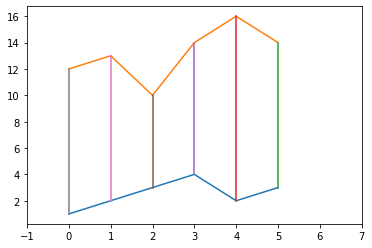

In [10]:
# -*- coding: utf-8 -*-

from math import *
import numpy as np
import sys


def DTW(A, B, window=sys.maxsize, d=lambda x, y: abs(x - y)):
    # 비용 행렬 초기화
    A, B = np.array(A), np.array(B)
    M, N = len(A), len(B)
    cost = sys.maxsize * np.ones((M, N))

    # 첫번째 로우,컬럼 채우기
    cost[0, 0] = d(A[0], B[0])
    for i in range(1, M):
        cost[i, 0] = cost[i - 1, 0] + d(A[i], B[0])

    for j in range(1, N):
        cost[0, j] = cost[0, j - 1] + d(A[0], B[j])

    # 나머지 행렬 채우기
    for i in range(1, M):
        for j in range(max(1, i - window), min(N, i + window)):
            choices = cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]
            cost[i, j] = min(choices) + d(A[i], B[j])

    # 최적 경로 구하기
    n, m = N - 1, M - 1
    path = []

    while (m, n) != (0, 0):
        path.append((m, n))
        m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key=lambda x: cost[x[0], x[1]])

    path.append((0, 0))
    return cost[-1, -1], path


def main():
    A = np.array([1,2,3,4,2,3])
    B = np.array([7,8,5,9,11,9])

    cost, path = DTW(A, B, window = 6)
    print ('Total Distance is ', cost)

    import matplotlib.pyplot as plt
    offset = 5
    plt.xlim([-1, max(len(A), len(B)) + 1])
    plt.plot(A)
    plt.plot(B + offset)
    for (x1, x2) in path:
        plt.plot([x1, x2], [A[x1], B[x2] + offset])
    plt.show()

if __name__ == '__main__':
    main()